## Calculating the field due to a cylinder
Units are always SI, by defauly with length in (mm), and B, J in (T).

In [1]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab. Installing package from pypi')
    %pip install pymagnet -q
else:
    print('Not running on CoLab.')

Not running on CoLab.


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pymagnet as pm
import numpy as np

OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


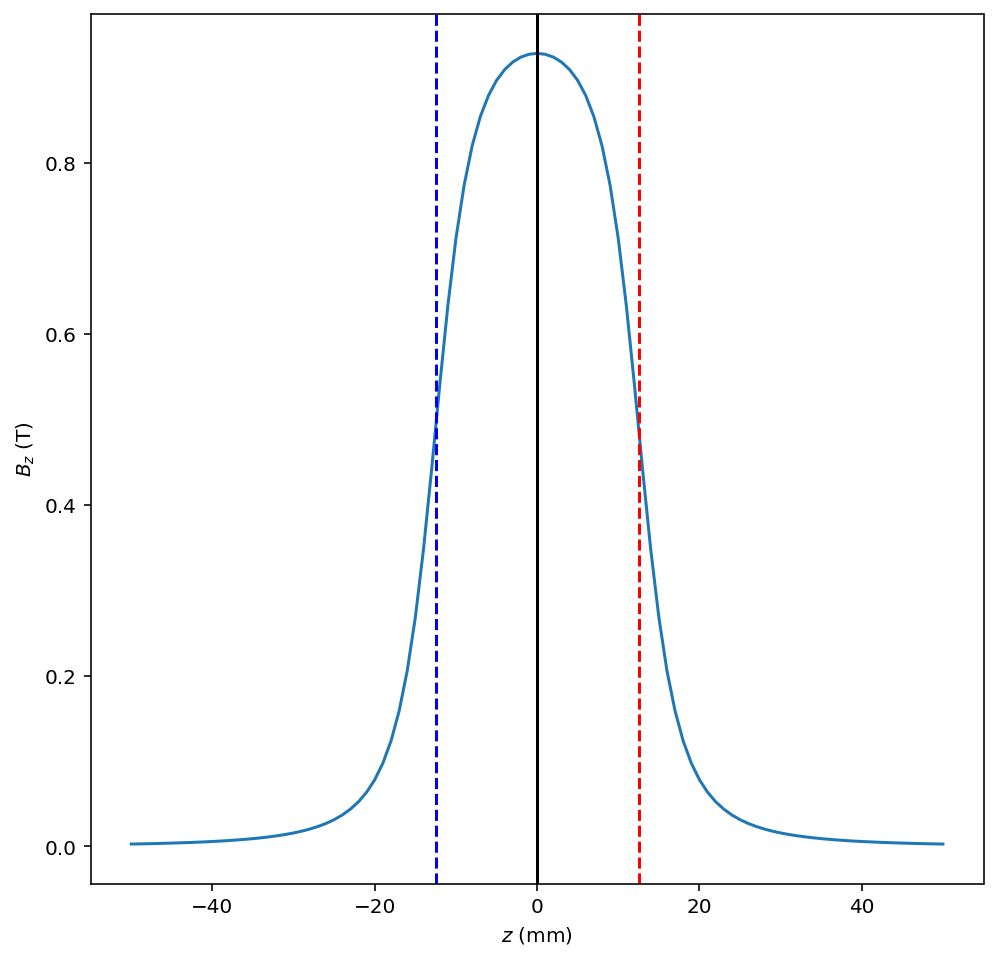

In [3]:
R = 5
L = 25
unit = 'mm'
m_cyl = pm.magnets.Cylinder(radius = R,
                            length = L,
                            Jr = 1.0, # remnant magnetisation in T
                            center=(0.0, 0.0, 0))

pm.plots.plot_1D_field(m_cyl, unit=unit);

The dashed blue and red lines mark the bottom and top of the magnet. 

We can look at the details of the instantiated magnet like this:

In [4]:
m_cyl

Cylinder
J: 1.0 (T)
Size: [ 5 25]
Center [0. 0. 0.]
Orientation alpha,beta,gamma: [0. 0. 0.]

## Calculating the field due to a Cuboid/Prism

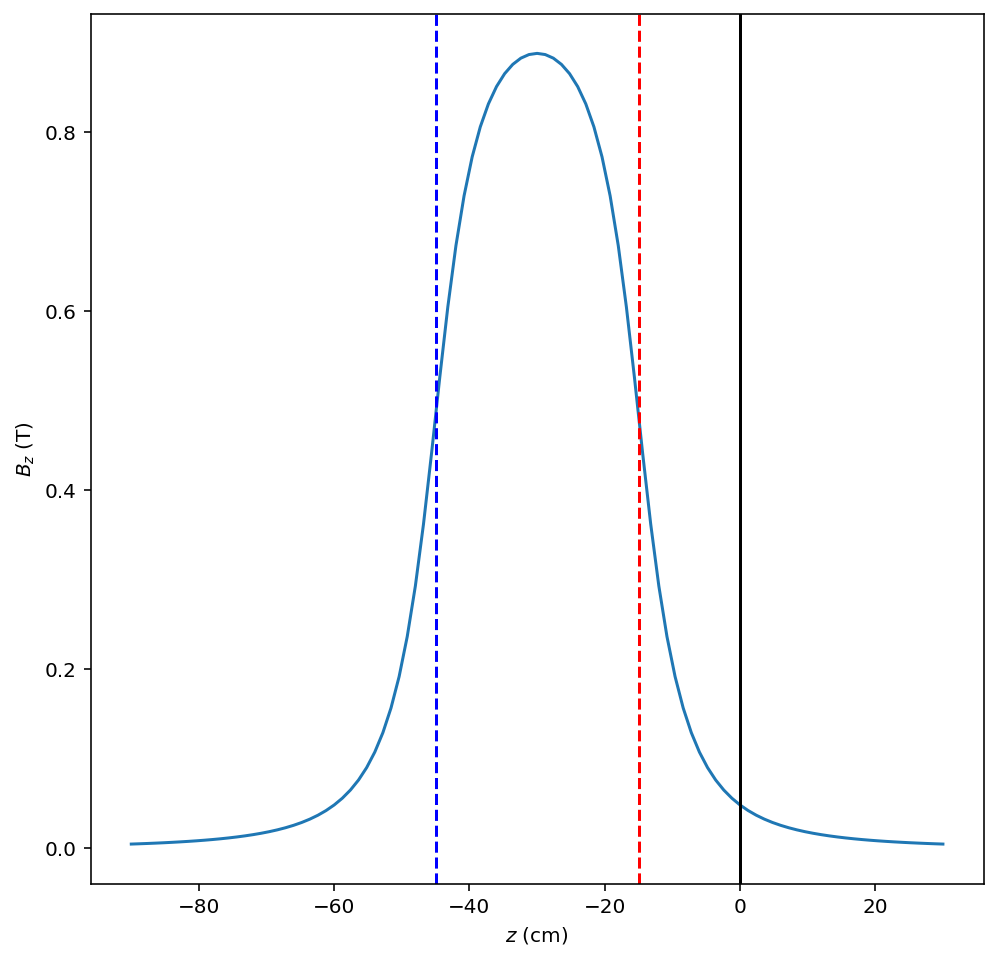

In [5]:
width = 10.0
unit = 'cm'
depth = 2*width
height = 3*width
m_quad = pm.magnets.Prism(width= width,
                          depth = depth,
                          height=height,
                          Jr = 1.0,
                          center=(0.0, 0.0, -height))

pm.plots.plot_1D_field(m_quad, unit=unit)

If we wish, we can mask the field _inside_ the magnet, by passing the keyword `mask_magnet = True`:

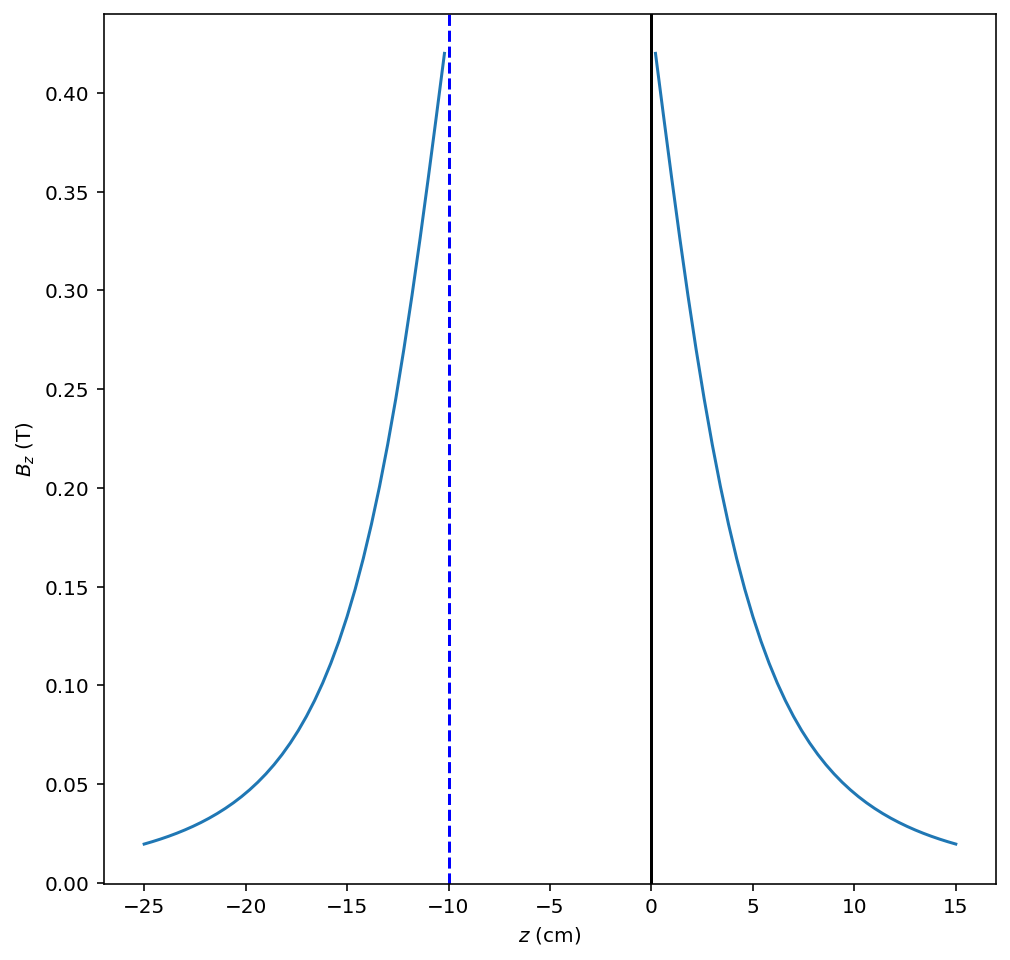

In [6]:
width = 10.0
unit = 'cm'
m_cube = pm.magnets.Cube(width= width,
                         Jr = 1.0,
                         center=(0.0, 0.0, -width/2),
                         mask_magnet = True)

pm.plots.plot_1D_field(m_cube, unit=unit)

Accessing the calculated data:

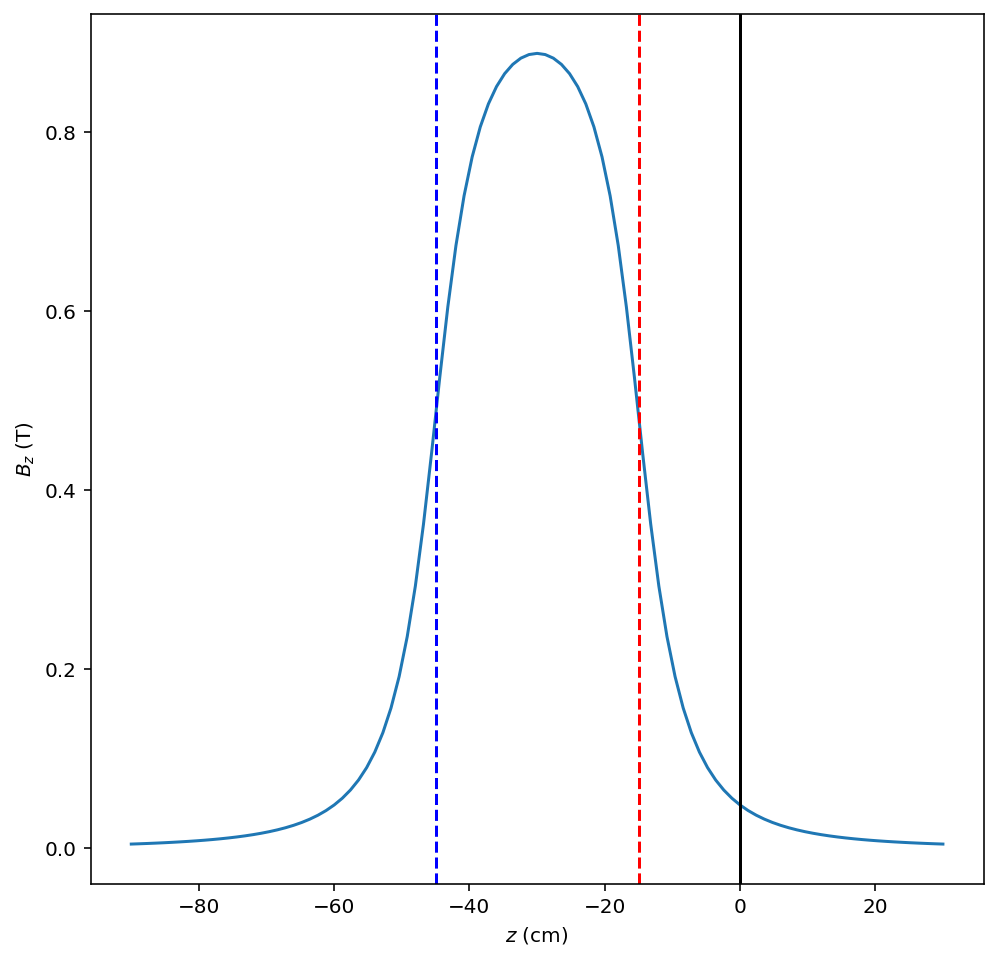

Shape of arrays: z:(101,), Bz:(101,)


In [7]:
width = 10.0
depth = 2*width
height = 3*width
unit = 'cm'
m_quad = pm.magnets.Prism(width= width,
                          depth = depth,
                          height=height,
                          Jr = 1.0,
                          center=(0.0, 0.0, -height))

points, field = pm.plots.plot_1D_field(m_quad, unit=unit, return_data=True)

print(f"Shape of arrays: z:{points.z.shape}, Bz:{field.z.shape}")

The calculation rountine can be accessed with:
``` python
field = pm.magnets.magnetic_field_cylinder_1D(magnet, points)
```

using the previously defined magnet, `magnet`, and noting that `points` is an object with position `points.z` relative to the _center_ of the magnet.

In [8]:

R = 5
L = 25
z = np.linspace(0, L, 11)
unit = 'cm'

m_cyl = pm.magnets.Cylinder(radius = R,
                            length = L,
                            Jr = 1.0, # remnant magnetisation in T
                            center=(0.0, 0.0, 0))

field = pm.magnets.magnetic_field_cylinder_1D(m_cyl, z)
field


[Unit: T
Bz: [0.92847669 0.92155524 0.89678712 0.83862464 0.71170033 0.49029034
 0.26832816 0.13964357 0.0781607  0.04776115 0.0313756 ]]